<a href="https://colab.research.google.com/github/nise1301/NBA_stats/blob/main/NBA_EDA_AT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Estatística de Jogadores da NBA

Realizamos uma análise exploratória dos dados de jogadores da NBA, focando em como características físicas (altura) e performance (pontuação, eficiência) se relacionam com o salário e a chance de serem draftados.

---

## 1. Configuração Inicial e Carregamento de Dados

Nesta seção, importamos as bibliotecas necessárias e carregamos o dataset de jogadores da NBA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Int_Ciencia_Dados/nba_stats.csv')

## 2. Exploração Inicial dos Dados

Realizamos verificações básicas para entender a estrutura do dataset, identificar valores ausentes e duplicados, e obter estatísticas descritivas.

In [ ]:
df

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,2023,Peyton Watson,4576087,peyton-watson,F,DEN,active,23.0,8.086957,0.608696,...,Forward,9/11/2002 (20),UCLA,"2022: Rd 1, Pk 30 (OKC)","Long Beach, CA",Denver Nuggets,"6' 8"", 200 lbs",Rookie,277,"$2,303,520"
8158,2023,Josh Minott,4687718,josh-minott,F,MIN,active,15.0,6.400000,0.666667,...,Forward,7/25/2002 (20),Memphis,"2022: Rd 2, Pk 45 (CHA)","Boca Raton, FL",Minnesota Timberwolves,"6' 8"", 205 lbs",Rookie,332,"$1,719,864"
8159,2023,Dalen Terry,4433159,dalen-terry,F,CHI,active,38.0,5.631579,0.631579,...,Forward,7/12/2002 (20),Arizona,"2022: Rd 1, Pk 18 (CHI)","Phoenix, AZ",Chicago Bulls,"6' 7"", 200 lbs",Rookie,238,"$3,350,760"
8160,2023,Ryan Rollins,4591725,ryan-rollins,G,GS,active,12.0,5.166666,0.833333,...,Guard,7/3/2002 (21),Toledo,"2022: Rd 2, Pk 44 (ATL)","Macomb, MI",Golden State Warriors,"6' 3"", 180 lbs",Rookie,334,"$1,719,864"


In [ ]:
df.isnull().sum()

,0
year,0
name,0
playerId,0
playerSlug,0
positionId,6
teamId,0
status,0
gamesPlayed,0
avgMinutes,0
avgFouls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,year,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,rankingSalary
count,8162.000000,8.162000e+03,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,...,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,2012.214776,8.666390e+05,57.978804,22.519525,1.962077,0.297599,2.159642,0.145430,5.431144,0.172507,...,129.835212,110.210365,144.387405,133.548395,81.996815,0.706763,0.463943,44.879441,29.252022,210.610512
std,6.701035,1.517331e+06,21.756214,9.478818,0.750375,0.653207,3.217839,0.446963,10.202230,1.263530,...,142.367073,109.945917,137.447434,139.569406,63.099111,0.437720,0.486103,34.028145,34.792868,140.763132
min,1999.000000,2.000000e+00,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2007.000000,9.290000e+02,46.000000,15.097222,1.446808,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,31.000000,44.250000,35.000000,33.000000,0.383562,0.147059,18.000000,7.000000,90.000000
50%,2013.000000,3.045500e+03,64.000000,22.769346,1.972222,0.000000,1.000000,0.000000,1.000000,0.000000,...,82.000000,77.000000,104.000000,88.000000,69.000000,0.634146,0.307692,39.000000,18.000000,192.000000
75%,2018.000000,2.451037e+06,76.000000,30.448024,2.486486,0.000000,3.000000,0.000000,6.000000,0.000000,...,218.000000,154.000000,203.000000,185.000000,118.000000,0.946429,0.597170,64.000000,38.000000,321.000000
max,2023.000000,4.997528e+06,85.000000,43.700000,6.000000,9.000000,41.000000,7.000000,69.000000,42.000000,...,1028.000000,756.000000,916.000000,925.000000,464.000000,2.885246,3.913044,225.000000,307.000000,676.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

## 3. Preparação e Limpeza dos Dados

Criamos funções para converter as colunas de altura e salário para formatos numéricos e aplicamos essas funções ao dataset. Em seguida, filtramos os dados para incluir apenas jogadores com informações completas de altura e salário, removendo possíveis duplicatas por nome de jogador para garantir a unicidade na análise.

In [ ]:
# Preparação dos dados
def converter_altura(altura_str):
    #Converte altura de '6\' 11"' para pés decimais
    if pd.isna(altura_str):
        return np.nan
    try:
        # Extrair pés e polegadas
        parts = str(altura_str).replace('"', '').split("'")
        if len(parts) == 2:
            pes = float(parts[0].strip())
            polegadas = float(parts[1].strip())
            return round(pes + polegadas/12, 2)
    except:
        return np.nan

In [ ]:
def converter_salario(salary_str):
    # Converte salário de '$1,000,000' para float
    if pd.isna(salary_str):
        return np.nan
    try:
        return float(str(salary_str).replace('$', '').replace(',', ''))
    except:
        return np.nan

In [ ]:
# Separar altura e peso da coluna 'htwt'
df[['altura_raw', 'peso_raw']] = df['htwt'].str.split(', ', expand=True)

# Converter dados
df['altura_pes'] = df['altura_raw'].apply(converter_altura)
df['salary_num'] = df['salary'].apply(converter_salario)

# Filtrar dados válidos (evita duplicações por jogador-ano)
dados = df.dropna(subset=['altura_pes', 'salary_num']).drop_duplicates(subset=['name'], keep='last')
print(f"Dados preparados: {len(dados):,} jogadores únicos com altura e salário válidos")

Dados preparados: 433 jogadores únicos com altura e salário válidos


## 4. Análise: Altura vs Draft

Investigamos a relação entre a altura dos jogadores e a probabilidade de serem draftados para a NBA.

In [ ]:
# Análise simples: Altura vs Draft
# Converter informações de draft
dados['foi_draftado'] = dados['draftinfo'].notna()

# Separar jogadores draftados e não draftados
draftados = dados[dados['foi_draftado'] == True]
nao_draftados = dados[dados['foi_draftado'] == False]

print("ANÁLISE ALTURA vs DRAFT")
print("=" * 25)
print(f"Jogadores draftados: {len(draftados):,}")
print(f"Jogadores não draftados: {len(nao_draftados):,}")
print(f"Altura média - Draftados: {draftados['altura_pes'].mean():.2f} pés")
print(f"Altura média - Não Draftados: {nao_draftados['altura_pes'].mean():.2f} pés")
print(f"Diferença: {draftados['altura_pes'].mean() - nao_draftados['altura_pes'].mean():.2f} pés")

ANÁLISE ALTURA vs DRAFT
Jogadores draftados: 356
Jogadores não draftados: 77
Altura média - Draftados: 6.57 pés
Altura média - Não Draftados: 6.51 pés
Diferença: 0.07 pés


In [ ]:
# Análise por faixas de altura
dados['faixa_altura'] = pd.cut(dados['altura_pes'],
                              bins=[5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.5],
                              labels=['5.8-6.0', '6.0-6.2', '6.2-6.4', '6.4-6.6',
                                     '6.6-6.8', '6.8-7.0', '7.0+'])

# Taxa de draft por faixa
analise_draft = dados.groupby('faixa_altura').agg({
    'foi_draftado': ['count', 'sum', 'mean']
}).round(3)

analise_draft.columns = ['Total', 'Draftados', 'Taxa_Draft']

print(f"\nTAXA DE DRAFT POR FAIXA DE ALTURA:")
print(analise_draft)


TAXA DE DRAFT POR FAIXA DE ALTURA:
              Total  Draftados  Taxa_Draft
faixa_altura                              
5.8-6.0          12          6       0.500
6.0-6.2          28         25       0.893
6.2-6.4          66         55       0.833
6.4-6.6         144        111       0.771
6.6-6.8          94         78       0.830
6.8-7.0          82         76       0.927
7.0+              7          5       0.714


/tmp/ipython-input-1647219194.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_draft = dados.groupby('faixa_altura').agg({


In [ ]:
# Conclusão sobre draft
taxa_max = analise_draft['Taxa_Draft'].max()
taxa_min = analise_draft['Taxa_Draft'].min()
faixa_melhor = analise_draft['Taxa_Draft'].idxmax()

print(f"\nCONCLUSÃO:")
print(f"• Melhor faixa: {faixa_melhor} ({taxa_max:.1%} de taxa de draft)")
print(f"• Variação total: {taxa_max - taxa_min:.1%}")
print(f"• Altura INFLUENCIA o draft mas não garante sucesso!")


CONCLUSÃO:
• Melhor faixa: 6.8-7.0 (92.7% de taxa de draft)
• Variação total: 42.7%
• Altura INFLUENCIA o draft mas não garante sucesso!


# Altura vs Draft: a realidade

- Embora a altura seja um fator relevante na seleção para o draft da NBA, ela por si só não determina o sucesso ou a performance de um jogador na liga. Outras habilidades como técnica de arremesso, agilidade, visão de jogo, inteligência tática e mentalidade competitiva são cruciais para a adaptação e o desenvolvimento na NBA.

- O draft representa uma OPORTUNIDADE, mas o jogador precisa provar seu valor e evoluir constantemente para se manter em alto nível e garantir seu sucesso na carreira profissional.

- Veremos, então, se outras métricas se associam a altura como adição ou restrição.

## 5. Análise: Altura vs Salário

Exploramos a correlação entre a altura dos jogadores e seus salários na NBA.

In [ ]:
# Análise de correlação
correlacao = dados['altura_pes'].corr(dados['salary_num'])

print("CORRELAÇÃO ALTURA vs SALÁRIO")
print("=" * 30)
print(f"Pearson r: {correlacao:.4f}")
print(f"R²: {correlacao**2:.4f} ({correlacao**2:.1%} da variância explicada)")

# Interpretação
if abs(correlacao) < 0.1:
    forca = "muito fraca"
elif abs(correlacao) < 0.3:
    forca = "fraca"
else:
    forca = "moderada"

print(f"Correlação: {forca}")
print(f"\nCONCLUSÃO: A altura tem impacto {forca} no salário dos jogadores NBA")

# Estatísticas básicas
print(f"\nESTATÍSTICAS:")
print(f"Altura média: {dados['altura_pes'].mean():.2f} pés")
print(f"Salário médio: ${dados['salary_num'].mean():,.0f}")
print(f"Amostra: {len(dados):,} jogadores")

CORRELAÇÃO ALTURA vs SALÁRIO
Pearson r: -0.0208
R²: 0.0004 (0.0% da variância explicada)
Correlação: muito fraca

CONCLUSÃO: A altura tem impacto muito fraca no salário dos jogadores NBA

ESTATÍSTICAS:
Altura média: 6.56 pés
Salário médio: $9,664,662
Amostra: 433 jogadores


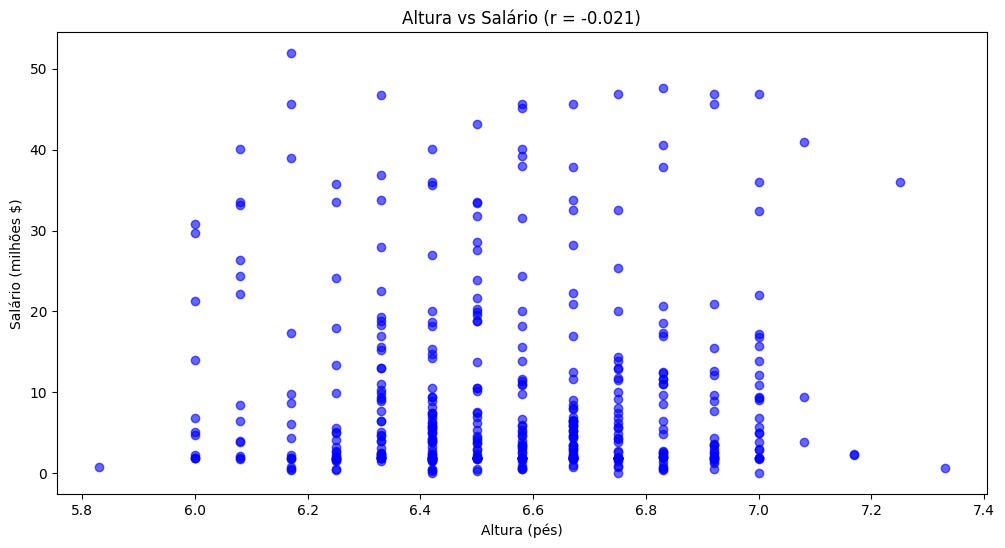

In [ ]:
# Visualização
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(dados['altura_pes'], dados['salary_num']/1e6, alpha=0.6, color='blue')
plt.xlabel('Altura (pés)')
plt.ylabel('Salário (milhões $)')
plt.title(f'Altura vs Salário (r = {correlacao:.3f})')
plt.show()

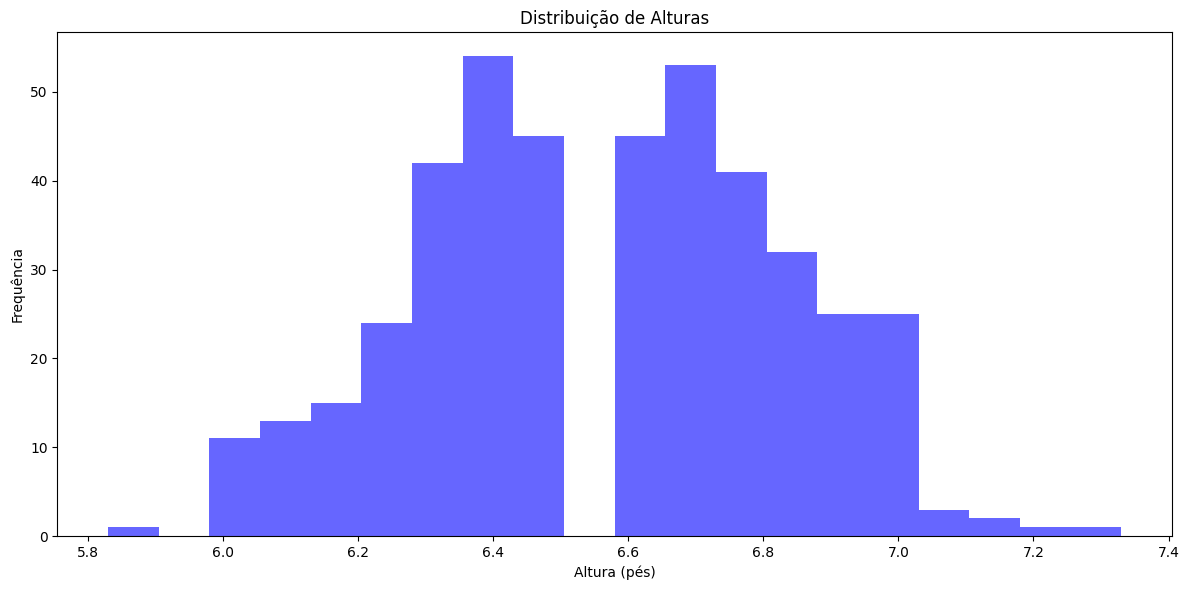

In [ ]:
# Histograma de alturas
plt.figure(figsize=(12, 6))
plt.hist(dados['altura_pes'], bins=20,alpha=0.6, color='blue')
plt.xlabel('Altura (pés)')
plt.ylabel('Frequência')
plt.title('Distribuição de Alturas')

plt.tight_layout()
plt.show()

## 6. Análise: Volume de Arremessos vs Eficiência

Analisamos se a quantidade de arremessos tentados por um jogador afeta sua porcentagem de acerto.

In [ ]:
# ======================================================================================
# ANÁLISE 1: Quem arremessa mais acerta menos? Será que quantidade compromete qualidade?
# ======================================================================================

print("ANÁLISE: VOLUME vs EFICIÊNCIA")
print("=" * 35)

# Pegar apenas jogadores com dados completos
jogadores_completos = dados.dropna(subset=['fieldGoalsAttempted', 'fieldGoalPct'])
print(f"Jogadores analisados: {len(jogadores_completos):,}")

# Calcular a correlação (relação entre as variáveis)
correlacao = jogadores_completos['fieldGoalsAttempted'].corr(jogadores_completos['fieldGoalPct'])
print(f"Correlação volume vs eficiência: {correlacao:.3f}")

# Dividir em dois grupos simples
# Quem arremessa muito vs quem arremessa pouco
tentativas_media = jogadores_completos['fieldGoalsAttempted'].median()

grupo_muito = jogadores_completos[jogadores_completos['fieldGoalsAttempted'] >= tentativas_media]
grupo_pouco = jogadores_completos[jogadores_completos['fieldGoalsAttempted'] < tentativas_media]

print(f"COMPARAÇÃO DOS GRUPOS:")
print(f"Arremessam MUITO (≥{tentativas_media:.0f} tentativas):")
print(f"   • {len(grupo_muito)} jogadores")
print(f"   • Eficiência média: {grupo_muito['fieldGoalPct'].mean():.1f}%")

print(f"\nArremessam POUCO (<{tentativas_media:.0f} tentativas):")
print(f"   • {len(grupo_pouco)} jogadores")
print(f"   • Eficiência média: {grupo_pouco['fieldGoalPct'].mean():.1f}%")

# Passo 4: Conclusão simples
diferenca = grupo_muito['fieldGoalPct'].mean() - grupo_pouco['fieldGoalPct'].mean()
print(f"RESULTADO:")
print(f"Diferença na eficiência: {diferenca:.1f} pontos percentuais")

if diferenca > 2:
    print("Quem arremessa MAIS é MAIS eficiente!")
elif diferenca < -2:
    print("Quem arremessa MAIS é MENOS eficiente!")
else:
    print("Volume NÃO afeta muito a eficiência!")

ANÁLISE: VOLUME vs EFICIÊNCIA
Jogadores analisados: 433
Correlação volume vs eficiência: 0.090
COMPARAÇÃO DOS GRUPOS:
Arremessam MUITO (≥386 tentativas):
   • 217 jogadores
   • Eficiência média: 47.7%

Arremessam POUCO (<386 tentativas):
   • 216 jogadores
   • Eficiência média: 46.2%
RESULTADO:
Diferença na eficiência: 1.5 pontos percentuais
Volume NÃO afeta muito a eficiência!


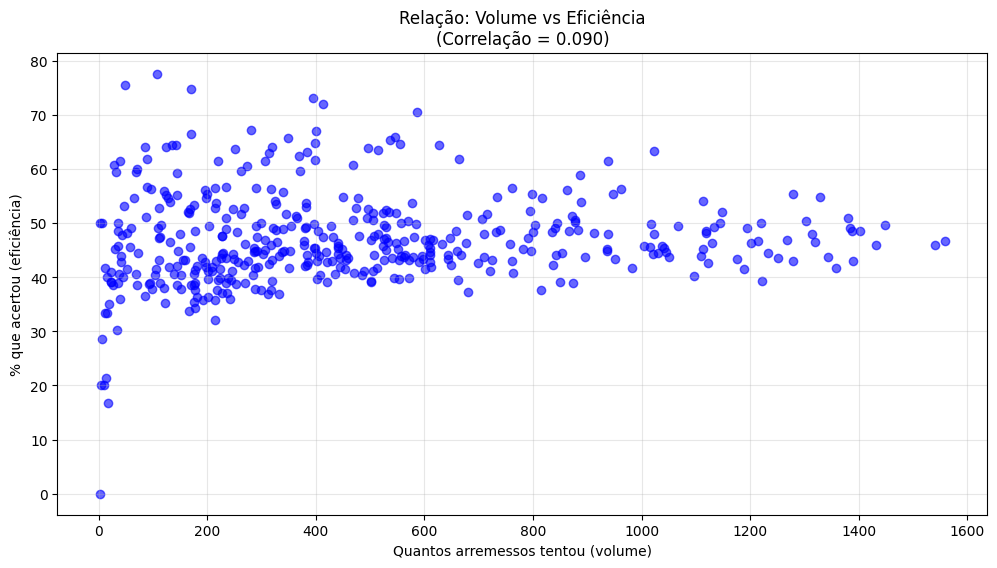

In [ ]:
# Visualização Simples: Volume vs Eficiência
plt.figure(figsize=(12, 6))

# Gráfico 1: Pontos no gráfico (scatter plot)
plt.scatter(jogadores_completos['fieldGoalsAttempted'],
           jogadores_completos['fieldGoalPct'],
           alpha=0.6, color='blue')
plt.xlabel('Quantos arremessos tentou (volume)')
plt.ylabel('% que acertou (eficiência)')
plt.title(f'Relação: Volume vs Eficiência\n(Correlação = {correlacao:.3f})')
plt.grid(True, alpha=0.3)

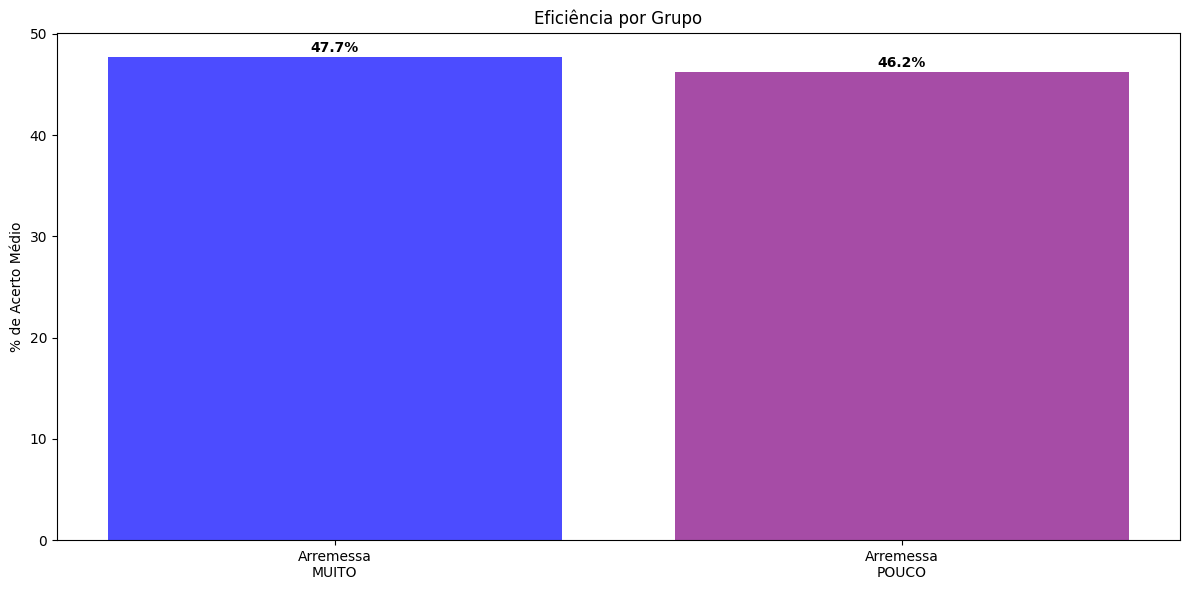

In [ ]:
# Gráfico 2: Comparação simples dos grupos
plt.figure(figsize=(12, 6))
grupos = ['Arremessa\nMUITO', 'Arremessa\nPOUCO']
eficiencias = [grupo_muito['fieldGoalPct'].mean(), grupo_pouco['fieldGoalPct'].mean()]

bars = plt.bar(grupos, eficiencias, color=['blue', 'purple'], alpha=0.7)
plt.title('Eficiência por Grupo')
plt.ylabel('% de Acerto Médio')

# Mostrar os valores nas barras
for i, valor in enumerate(eficiencias):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Explicação
print("• Se correlação próxima de 0 → Volume NÃO afeta eficiência")
print("• Se correlação positiva → Mais volume = Mais eficiência")
print("• Se correlação negativa → Mais volume = Menos eficiência")
print(f"• Nossa correlação ({correlacao:.3f}) é muito próxima de 0!")

• Se correlação próxima de 0 → Volume NÃO afeta eficiência
• Se correlação positiva → Mais volume = Mais eficiência
• Se correlação negativa → Mais volume = Menos eficiência
• Nossa correlação (0.090) é muito próxima de 0!


## 7. Análise: Altura vs Pontuação

Investigamos se a altura de um jogador tem impacto em sua média de pontos por jogo.

In [ ]:
print("ANÁLISE 2: ALTURA vs PONTUAÇÃO")
print("=" * 35)

# Pegar apenas jogadores com dados completos (altura e pontos)
jogadores_completos = dados.dropna(subset=['altura_pes', 'avgPoints'])
print(f"Jogadores analisados: {len(jogadores_completos):,}")

# Calcular a correlação
correlacao = jogadores_completos['altura_pes'].corr(jogadores_completos['avgPoints'])
print(f"Correlação altura vs pontos: {correlacao:.3f}")

# Dividir em apenas 2 grupos (alto vs baixo)
altura_media = jogadores_completos['altura_pes'].median()

grupo_altos = jogadores_completos[jogadores_completos['altura_pes'] >= altura_media]
grupo_baixos = jogadores_completos[jogadores_completos['altura_pes'] < altura_media]

print(f"COMPARAÇÃO:")
print(f"Jogadores ALTOS (≥{altura_media:.1f} pés):")
print(f"   • {len(grupo_altos)} jogadores")
print(f"   • Pontuação média: {grupo_altos['avgPoints'].mean():.1f} pts/jogo")

print(f"\nJogadores BAIXOS (<{altura_media:.1f} pés):")
print(f"   • {len(grupo_baixos)} jogadores")
print(f"   • Pontuação média: {grupo_baixos['avgPoints'].mean():.1f} pts/jogo")

# Conclusão
diferenca = grupo_altos['avgPoints'].mean() - grupo_baixos['avgPoints'].mean()
print(f"RESULTADO:")
print(f"Diferença na pontuação: {diferenca:.1f} pontos por jogo")

if diferenca > 2:
    print("Jogadores ALTOS pontuam MAIS!")
elif diferenca < -2:
    print("Jogadores BAIXOS pontuam MAIS!")
else:
    print("Altura NÃO faz muita diferença na pontuação!")

ANÁLISE 2: ALTURA vs PONTUAÇÃO
Jogadores analisados: 433
Correlação altura vs pontos: -0.090
COMPARAÇÃO:
Jogadores ALTOS (≥6.6 pés):
   • 228 jogadores
   • Pontuação média: 9.6 pts/jogo

Jogadores BAIXOS (<6.6 pés):
   • 205 jogadores
   • Pontuação média: 10.9 pts/jogo
RESULTADO:
Diferença na pontuação: -1.3 pontos por jogo
Altura NÃO faz muita diferença na pontuação!


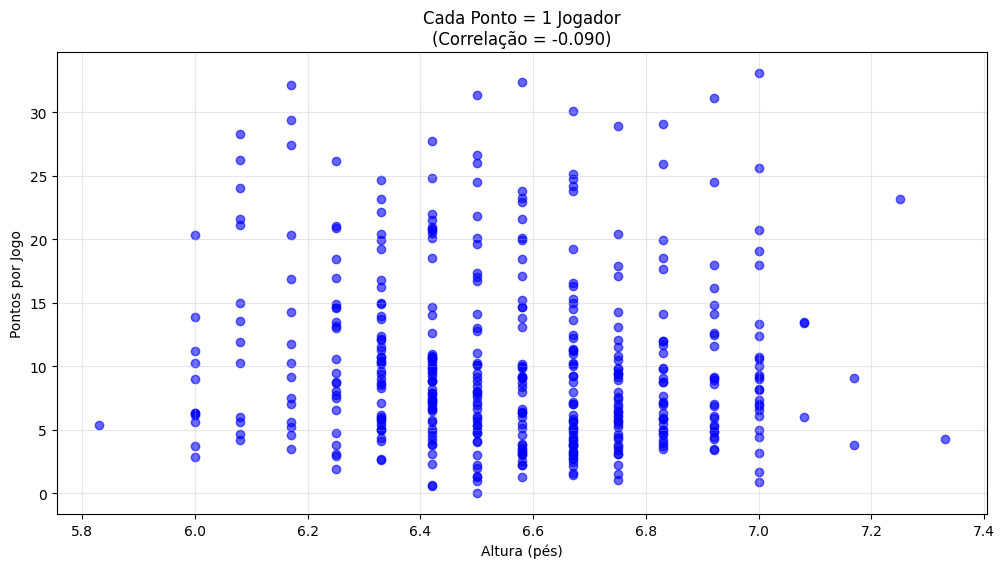

In [ ]:
# Visualização: Altura vs Pontuação
plt.figure(figsize=(12, 6))

# Gráfico 1: Pontos no gráfico (cada ponto é um jogador)
plt.scatter(jogadores_completos['altura_pes'], jogadores_completos['avgPoints'],
           alpha=0.6, color='blue')
plt.xlabel('Altura (pés)')
plt.ylabel('Pontos por Jogo')
plt.title(f'Cada Ponto = 1 Jogador\n(Correlação = {correlacao:.3f})')
plt.grid(True, alpha=0.3)

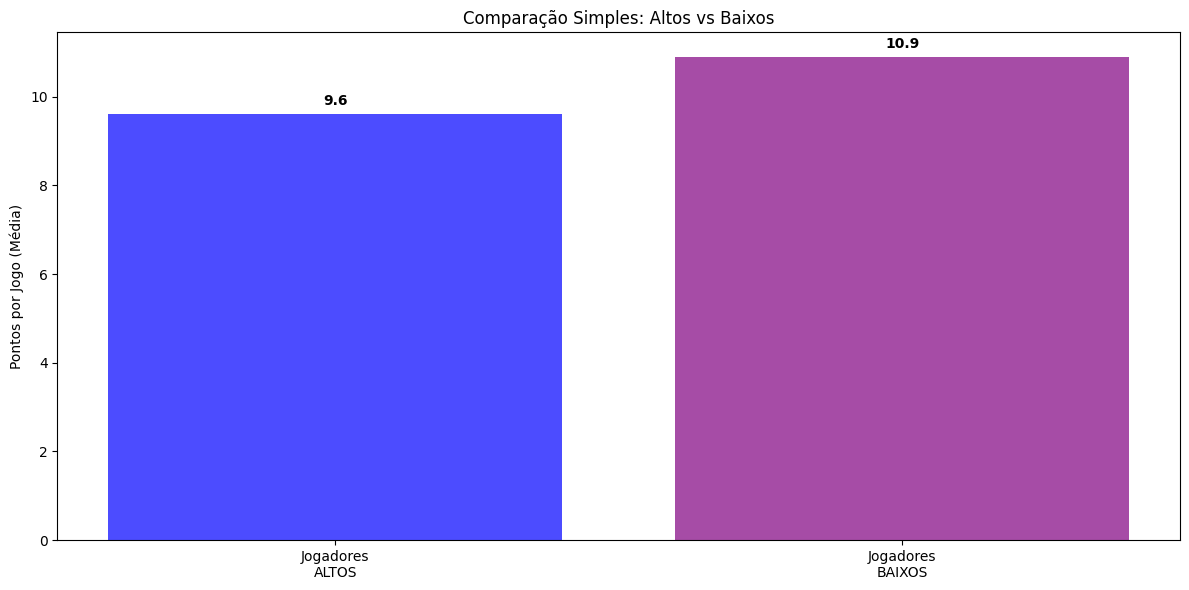

In [ ]:
# Gráfico 2: Comparação dos grupos
plt.figure(figsize=(12, 6))
grupos = ['Jogadores\nALTOS', 'Jogadores\nBAIXOS']
pontuacoes = [grupo_altos['avgPoints'].mean(), grupo_baixos['avgPoints'].mean()]

bars = plt.bar(grupos, pontuacoes, color=['blue', 'purple'], alpha=0.7)
plt.title('Comparação Simples: Altos vs Baixos')
plt.ylabel('Pontos por Jogo (Média)')

# Mostrar os valores nas barras
for i, valor in enumerate(pontuacoes):
    plt.text(i, valor + 0.2, f'{valor:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Análise: Pontuação vs Salário

Analisamos a forte correlação entre a média de pontos por jogo de um jogador e seu salário.

In [ ]:
# =======================================================================
# ANÁLISE 3: PONTOS VALEM DINHEIRO? Quem pontua mais ganha mais dinheiro?
# =======================================================================

print("ANÁLISE 3: PONTOS vs SALÁRIO")
print("=" * 35)

# Pegar apenas jogadores com dados completos (pontos e salário)
jogadores_completos = dados.dropna(subset=['avgPoints', 'salary_num'])
print(f"Jogadores analisados: {len(jogadores_completos):,}")

# Calcular a correlação
correlacao = jogadores_completos['avgPoints'].corr(jogadores_completos['salary_num'])
print(f"Correlação pontos vs salário: {correlacao:.3f}")

# Dividir em apenas 2 grupos(alto vs baixo pontuador)
pontos_media = jogadores_completos['avgPoints'].median()

grupo_altos_pontos = jogadores_completos[jogadores_completos['avgPoints'] >= pontos_media]
grupo_baixos_pontos = jogadores_completos[jogadores_completos['avgPoints'] < pontos_media]

print(f"COMPARAÇÃO:")
print(f"ALTOS pontuadores (≥{pontos_media:.1f} pts/jogo):")
print(f"   • {len(grupo_altos_pontos)} jogadores")
print(f"   • Salário médio: ${grupo_altos_pontos['salary_num'].mean():,.0f}")

print(f"\nBAIXOS pontuadores (<{pontos_media:.1f} pts/jogo):")
print(f"   • {len(grupo_baixos_pontos)} jogadores")
print(f"   • Salário médio: ${grupo_baixos_pontos['salary_num'].mean():,.0f}")

# Conclusão
diferenca_salarial = grupo_altos_pontos['salary_num'].mean() - grupo_baixos_pontos['salary_num'].mean()
print(f"RESULTADO:")
print(f"Diferença salarial: ${diferenca_salarial:,.0f}")

if diferenca_salarial > 5000000:  # 5 milhões
    print("Quem pontua MAIS ganha MUITO mais dinheiro!")
elif diferenca_salarial > 1000000:  # 1 milhão
    print("Quem pontua MAIS ganha mais dinheiro!")
elif diferenca_salarial < -1000000:
    print("Quem pontua MENOS ganha mais dinheiro!")
else:
    print("Pontuação NÃO faz muita diferença no salário!")

ANÁLISE 3: PONTOS vs SALÁRIO
Jogadores analisados: 433
Correlação pontos vs salário: 0.792
COMPARAÇÃO:
ALTOS pontuadores (≥8.7 pts/jogo):
   • 217 jogadores
   • Salário médio: $15,190,410

BAIXOS pontuadores (<8.7 pts/jogo):
   • 216 jogadores
   • Salário médio: $4,113,331
RESULTADO:
Diferença salarial: $11,077,080
Quem pontua MAIS ganha MUITO mais dinheiro!


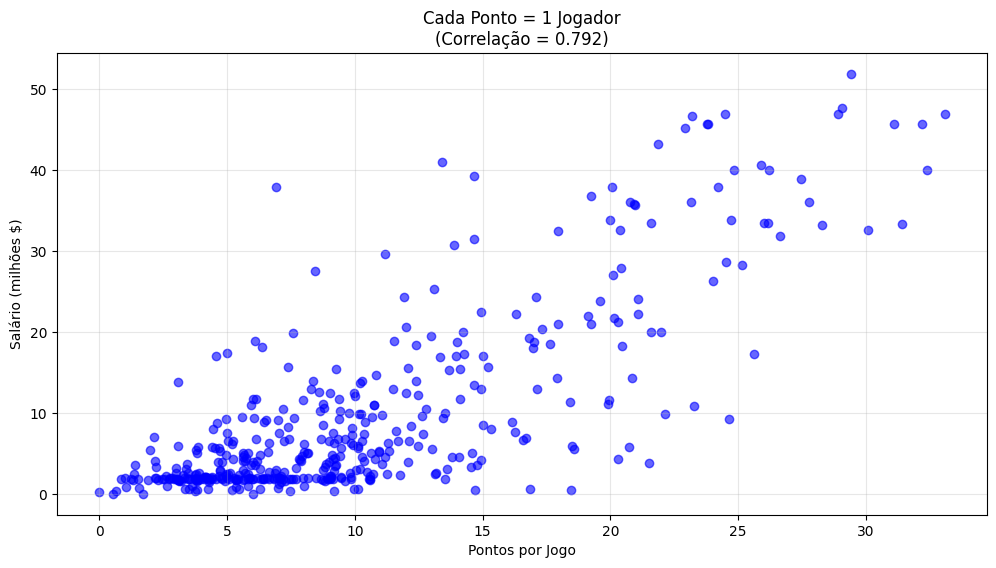

In [ ]:
# Visualização Simples: Pontos vs Salário
plt.figure(figsize=(12, 6))

# Gráfico 1: Pontos no gráfico (cada ponto é um jogador)
plt.scatter(jogadores_completos['avgPoints'], jogadores_completos['salary_num']/1e6,
           alpha=0.6, color='blue')
plt.xlabel('Pontos por Jogo')
plt.ylabel('Salário (milhões $)')
plt.title(f'Cada Ponto = 1 Jogador\n(Correlação = {correlacao:.3f})')
plt.grid(True, alpha=0.3)
plt.show()

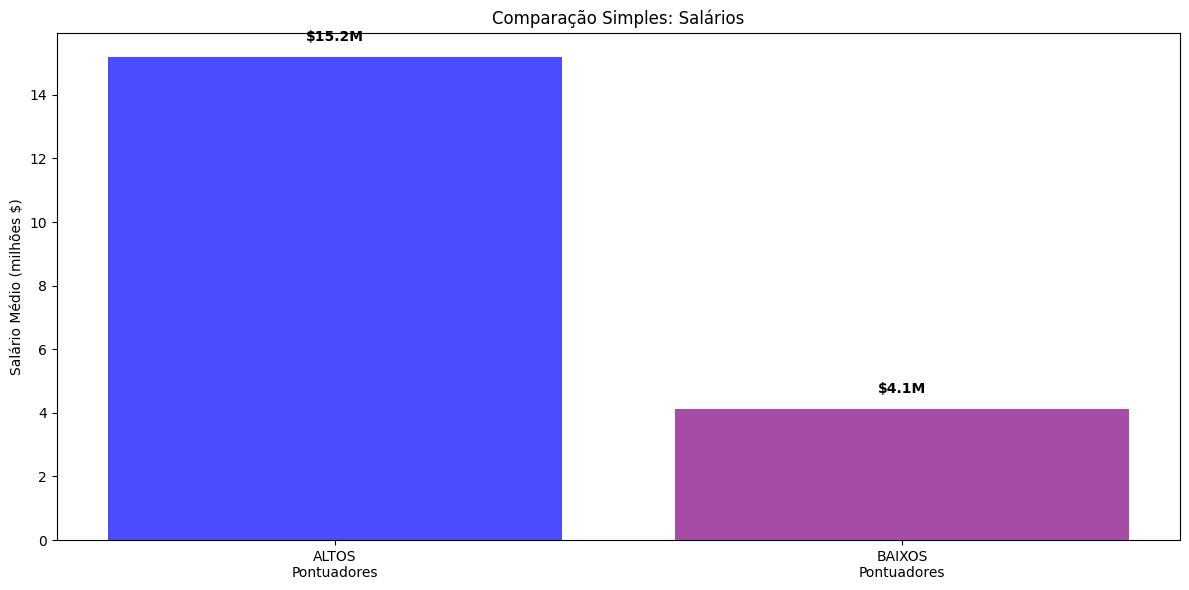

In [ ]:
# Gráfico 2: Comparação simples dos grupos
plt.figure(figsize=(12, 6))
grupos = ['ALTOS\nPontuadores', 'BAIXOS\nPontuadores']
salarios_medios = [grupo_altos_pontos['salary_num'].mean()/1e6,
                   grupo_baixos_pontos['salary_num'].mean()/1e6]

bars = plt.bar(grupos, salarios_medios, color=['blue', 'purple'], alpha=0.7)
plt.title('Comparação Simples: Salários')
plt.ylabel('Salário Médio (milhões $)')

# Mostrar os valores nas barras
for i, valor in enumerate(salarios_medios):
    plt.text(i, valor + 0.5, f'${valor:.1f}M', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Heatmap de Correlações

Geramos um heatmap para visualizar as correlações entre diversas variáveis importantes dos jogadores, incluindo altura, salário, pontos, eficiência, assistências e rebotes.

Analisando 433 jogadores


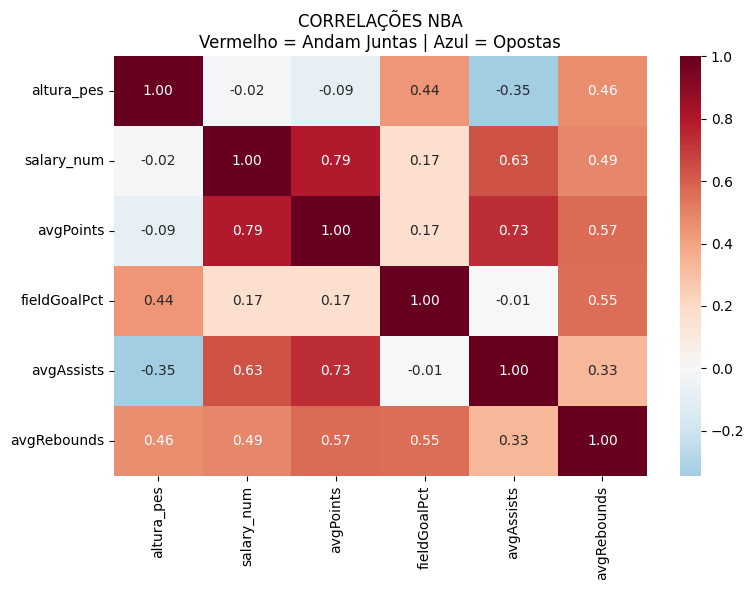

In [ ]:
# HEATMAP: Matriz de Correlações NBA

# Selecionar apenas as variáveis mais importantes
variaveis = [
    'altura_pes',      # Altura
    'salary_num',      # Salário
    'avgPoints',       # Pontos
    'fieldGoalPct',    # % Acerto
    'avgAssists',      # Assistências
    'avgRebounds'      # Rebotes
]

# Pegar dados completos
dados_limpos = dados[variaveis].dropna()
print(f"Analisando {len(dados_limpos):,} jogadores")

# Calcular correlações
correlacao = dados_limpos.corr()

# Criar heatmap simples
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao,
           annot=True,           # Mostrar números
           cmap='RdBu_r',        # Vermelho = positivo, Azul = negativo
           center=0,             # Branco = zero
           fmt='.2f')            # 2 casas decimais

plt.title('CORRELAÇÕES NBA\nVermelho = Andam Juntas | Azul = Opostas')
plt.tight_layout()
plt.show()

In [ ]:
# Destacar descobertas principais
print("PRINCIPAIS DESCOBERTAS:")
print(f"• Pontos vs Salário: {correlacao.loc['avgPoints', 'salary_num']:.2f} (FORTE)")
print(f"• Altura vs Pontos: {correlacao.loc['altura_pes', 'avgPoints']:.2f} (FRACA)")
print(f"• Altura vs Salário: {correlacao.loc['altura_pes', 'salary_num']:.2f} (QUASE ZERO)")
print()
print("CONCLUSÃO: Pontuação vale dinheiro, altura não!")

PRINCIPAIS DESCOBERTAS:
• Pontos vs Salário: 0.79 (FORTE)
• Altura vs Pontos: -0.09 (FRACA)
• Altura vs Salário: -0.02 (QUASE ZERO)

CONCLUSÃO: Pontuação vale dinheiro, altura não!


### **INTERPRETAÇÃO DO HEATMAP:**

#### **CORRELAÇÕES MAIS FORTES (Vermelho Escuro):**
- **Pontos ↔ Salário**: Performance ofensiva é ALTAMENTE valorizada
- **Assistências ↔ Pontos**: Jogadores que organizam também pontuam
- **Rebotes ↔ Pontos**: Jogadores completos fazem de tudo

#### **CORRELAÇÕES MODERADAS (Amarelo/Laranja):**
- **% Acerto ↔ Pontos**: Eficiência ainda importa para pontuação
- **Assistências ↔ Salário**: Organizar o jogo também vale dinheiro
- **Rebotes ↔ Salário**: Versatilidade é valorizada

#### **CORRELAÇÕES FRACAS/NEGATIVAS (Azul Claro/Branco):**
- **Altura ↔ Pontos**: Confirmado - gigantes não dominam o ataque
- **Altura ↔ Salário**: Paradoxo confirmado - altura não agrega valor salarial
- **Altura ↔ Assistências**: Jogadores baixos são melhores organizadores

### **VALIDAÇÃO DAS HIPÓTESES COM O HEATMAP:**
- **Pontuação vale dinheiro**: Correlação forte entre avgPoints e salary_num
- **Altura não domina**: Altura tem correlações fracas com pontos e salário
- **Habilidade importa**: % de acerto, assistências e rebotes se correlacionam com sucesso

### **CONCLUSÃO:**
- **O heatmap confirma: na NBA moderna, HABILIDADE e VERSATILIDADE valem mais que ALTURA. Jogadores completos que pontuam, organizam e são eficientes ganham mais dinheiro!**